<a href="https://colab.research.google.com/github/Sk8rSqurl/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Make_Features_Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 2*

---

# Make Features 

- Student should be able to understand the purpose of feature engineering
- Student should be able to work with strings in pandas
- Student should be able to work with dates and times in pandas
- Student should be able to modify or create columns of a dataframe using the `.apply()` function


Helpful Links:
- [Minimally Sufficient Pandas](https://medium.com/dunder-data/minimally-sufficient-pandas-a8e67f2a2428)
- [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
- Python Data Science Handbook
  - [Chapter 3.10](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), Vectorized String Operations
  - [Chapter 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html), Working with Time Series
- [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)

# [Objective](#feature-engineering) - The Purpose of Feature Engineering



## Overview

Feature Engineering is the process of using a combination of domain knowledge, creativity and the pre-existing columns of a dataset to create completely new columns.

 Machine Learning models try to detect patterns in the data and then associate those patterns with certain predictions. The hope is that by creating new columns on our dataset that we can expose our model to new patterns in the data so that it can make better and better predictions.

This is largely a matter of understanding how to work with individual columns of a dataframe with Pandas --which is what we'll be practicing today!

## Follow Along

Columns of a dataframe hold each hold a specific type of data. Lets inspect some of the common datatypes found in datasets and then we'll make a new feature on a dataset using pre-existing columns.

In [0]:
import pandas as pd

In [0]:
# Lets take a look at the Ames Iowa Housing Dataset:
source_url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv'

In [0]:
iowa = pd.read_csv(source_url)

In [0]:
# first few rows
iowa.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
485,486,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,2007,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,607,Unf,0,506,1113,GasA,...,Y,SBrkr,1113,0,0,1113,0,0,1,0,3,1,Gd,5,Typ,1,Gd,Attchd,1950.0,Unf,1,264,TA,TA,Y,0,80,120,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,147000
1222,1223,50,RL,78.0,10496,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Artery,Norm,1Fam,1.5Fin,6,6,1949,1950,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,320.0,TA,TA,CBlock,TA,TA,Mn,Rec,196,Unf,0,844,1040,GasA,...,Y,SBrkr,1168,678,0,1846,0,0,2,0,3,1,TA,7,Typ,1,Gd,Attchd,1949.0,Unf,1,315,TA,TA,Y,0,0,0,0,0,0,NaN,GdWo,NaN,0,1,2007,WD,Normal,143000
840,841,70,RH,NaN,12155,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,2Story,6,8,1925,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,BLQ,156,Unf,0,516,672,GasA,...,N,SBrkr,810,672,0,1482,0,0,2,0,4,1,Fa,7,Typ,0,NaN,Detchd,1934.0,Unf,1,400,TA,TA,P,0,0,254,0,0,0,NaN,NaN,NaN,0,3,2008,WD,Normal,140000
938,939,60,RL,73.0,8760,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Mn,GLQ,464,Unf,0,927,1391,GasA,...,Y,SBrkr,1391,571,0,1962,0,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2006.0,RFn,3,868,TA,TA,Y,0,90,0,0,0,0,NaN,NaN,NaN,0,8,2006,New,Partial,239799
378,379,20,RL,88.0,11394,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,2,2010,2010,Hip,CompShg,VinylSd,VinylSd,Stone,350.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1445,Unf,0,411,1856,GasA,...,Y,SBrkr,1856,0,0,1856,1,0,1,1,1,1,Ex,8,Typ,1,Ex,Attchd,2010.0,Fin,3,834,TA,TA,Y,113,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,New,Partial,394432


In [0]:
# shape
iowa.shape

(1460, 81)

In [0]:
# describe
iowa[['YearBuilt', 'MSSubClass']].describe()

,YearBuilt,MSSubClass
count,1460.000000,1460.000000
mean,1971.267808,56.897260
std,30.202904,42.300571
min,1872.000000,20.000000
25%,1954.000000,20.000000
50%,1973.000000,50.000000
75%,2000.000000,70.000000
max,2010.000000,190.000000


### Specific Columns hold specific kinds of data

In [0]:
# column types
pd.set_option('display.max_rows', 100)
iowa.dtypes[:4]

Id               int64
MSSubClass       int64
MSZoning        object
LotFrontage    float64
dtype: object

Some columns hold integer values like the `BedroomAbvGr` which stands for "Bedrooms Above Grade." This is the number of non-basement bedrooms in the home.

For more information on specific column meanings view the [data dictionary](https://github.com/ryanleeallred/datasets/blob/master/Ames%20Housing%20Data/data_description.txt).

In [0]:
# Look at the first ten rows of the `BedroomAbvGr` column.
# Looks like integers to me!
iowa['BedroomAbvGr'].dtype

dtype('int64')

# another way to call columns: dot method


In [0]:
iowa.Fireplaces.sample(4)

507    0
998    1
756    0
24     1
Name: Fireplaces, dtype: int64

In [0]:
iowa['Fireplaces'].sample(4)

485     1
898     2
1392    1
1363    1
Name: Fireplaces, dtype: int64

In [0]:
iowa[['Fire Places', 'BedroomAbvGr']].sample(4)

,Fireplaces,BedroomAbvGr
890,1,3
422,0,2
1320,2,3
3,1,3


Some columns hold float values like the `LotFrontage` column.

In [0]:
# Look at the first ten rows of the `lotFrontage` column.
iowa['LotFrontage'].head()

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

Hmmm, do the values above look like floats to you?

They all have .0 on them so technically they're being stored as floats, but *should* they be stored as floats?

Lets see what all of the possible values for this column are.

In [0]:
iowa['LotFrontage'].value_counts(dropna=False)

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 111, dtype: int64

Looks to me like the `LotFrontage` column originally held integer values but was cast to a `float` meaning that each original integer values was converted to its corresponding float representation. 

Any guesses as to why that would have happened?


HINT: What's the most common `LotFrontage` value for this column?

In [0]:
# NaN is the most common value in this column. What is a NaN
import numpy as np
np.nan

nan

`NaN` stands stands for "Not a Number" and is the default missing value indicator with Pandas. This means there were cells in this column that didn't have a LotFrontage value recorded for those homes. 

This is where domain knowledge starts to come in. Think about the context we're working with here: houses. What might a null or blank cell representing "Linear feet of street connected to property" mean in the context of a housing dataset?

Ok, so maybe it makes seanse to have some NaNs in this column. What is the datatype of a NaN value?

Perhaps some of this data is truly missing or unrecorded data, but sometimes `NaNs` are more likely to indicate something that was "NA" or "Not Applicable" to a particular observation. There could be multiple reasons why there was no value recorded for a particular feature.

Remember, that Pandas tries to maintain a single datatype for all values in a column, and therefore...

In [0]:
# What is the datatype of NaN?
type(np.nan)

float

The datatype of a NaN is float!  This means that if we have a column of integer values, but the column has even a single `NaN` that column will not be treated with the integer datatype but all of the integers will be converted to floats in order to try and preserve the same datatype throughout the entire column.

You can see already how understanding column datatypes is crucial to understanding how Pandas help us manage our data.

In [0]:
# how much missing data
iowa['LotFrontage'].isnull().sum()


259

In [0]:
# how big
iowa.shape

(1460, 81)

In [0]:
# drop missing data
iowa['LotFrontage'].dropna(inplace=True)

In [0]:
# now how much missing data?
iowa['LotFrontage'].isnull().sum()

0

### Making new Features

Lets slim down the dataset and consider just a few specific columns:

- `TotalBsmtSF`
- `1stFlrSF`
- `2ndFlrSF`
- `SalePrice1`


In [0]:
# I can make a smaller dataframe with a few specific column headers
# by passing a list of column headers inside of the square brackets
small=iowa[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'SalePrice']].copy()
small.sample(3)

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice
236,1414,1414,0,185500
1434,1126,1126,0,160000
783,1097,1110,0,165500


### Syntax for creating new columns

When making a new column on a dataframe, we have to use the square bracket syntax of accessing a column. We can't use "dot syntax" here.

In [0]:
# Lets add up all of the square footage to get a single square footage 
# column for the entire dataset
# Using bracket syntax to make a new 'TotalSquareFootage' column

small['TotalSF'] = small['TotalBsmtSF'] + small['1stFlrSF'] + small['2ndFlrSF']
small.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSF
0,1710,856,854,208500,3420
1,1262,1262,0,181500,2524
2,1786,920,866,223500,3572
3,1717,961,756,140000,3434
4,2198,1145,1053,250000,4396


In [0]:
# Lets make another new column that is 'PricePerSqFt' by
# dividing the price by the square footage
small['PricePerSF'] = small['SalePrice'] / small['TotalSF']
small.sample(5)

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSF,PricePerSF
601,1375,780,595,141000,2750,51.272727
1164,1432,1432,0,194000,2864,67.737430
852,1646,918,728,164000,3292,49.817740
264,764,764,0,73000,1528,47.774869
547,768,768,0,129500,1536,84.309896


Ok, we have made two new columns on our small dataset.

- What does a **high** `PricePerSqFt` say about a home that the square footage and price alone don't capture as directly?

- What does a **low** `PricePerSqFt` say about a home that the square footage and price alone don't directly capture?



In [0]:
## crosstabs
# focus on categorical 
iowa.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [0]:
# what are some categorical columns?
iowa[['LotShape', 'Alley', 'Street', 'SaleCondition']].sample(5)

,LotShape,Alley,Street,SaleCondition
6,Reg,NaN,Pave,Normal
1171,Reg,NaN,Pave,Normal
117,Reg,NaN,Pave,Partial
468,IR1,NaN,Pave,Normal
1197,IR1,NaN,Pave,Normal


In [0]:
# values of sale condition
iowa['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [0]:
# create a new categorical variable
iowa['NormalCondition'] = np.where(iowa['SaleCondition']=='Normal', 1, 0)
iowa['NormalCondition'].value_counts()

1    1198
0     262
Name: NormalCondition, dtype: int64

In [0]:
# value counts of a categorical variable
iowa['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [0]:
# Map this from four down to 3 values
iowa['LotShape3'] = iowa['LotShape'].map({'Reg':'Regular',
                                          'IR1':'Irregular',
                                          'IR2':'Other',
                                          'IR3':'Other'})
iowa['LotShape3'].value_counts()

Regular      925
Irregular    484
Other         51
Name: LotShape3, dtype: int64

In [0]:
# value counts of a categorical variable
iowa['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [0]:
# one more way to map categorical variables
# replace using .loc 
iowa['top_neighbors']='All Others'
iowa[['top_neighbors', 'Neighborhood']].head()

,top_neighbors,Neighborhood
0,All Others,CollgCr
1,All Others,Veenker
2,All Others,CollgCr
3,All Others,Crawfor
4,All Others,NoRidge


In [0]:
# step number 2: remap just the ones I want! ising .loc
iowa.loc[iowa['Neighborhood']=='NAmes', 'top_neighbors']='North Ames'
iowa[['top_neighbors', 'Neighborhood']].sample(10)

,top_neighbors,Neighborhood
565,All Others,SWISU
1037,All Others,CollgCr
1458,North Ames,NAmes
703,All Others,OldTown
605,North Ames,NAmes
1337,All Others,OldTown
1234,All Others,SWISU
2,All Others,CollgCr
826,All Others,BrkSide
1223,North Ames,NAmes


In [0]:
# do this multiple times if need be
iowa.loc[iowa['Neighborhood']=='CollgCr', 'top_neighbors']='College Circle'
iowa.loc[iowa['Neighborhood']=='Gilbert', 'top_neighbors']='Favorite Neighborhood'
iowa.loc[iowa['Neighborhood']=='Somerst', 'top_neighbors']='Favorite Neighborhood'
iowa[['top_neighbors', 'Neighborhood']].sample(10)

,top_neighbors,Neighborhood
1152,All Others,Crawfor
1421,All Others,NPkVill
842,North Ames,NAmes
1341,All Others,SawyerW
1063,All Others,OldTown
82,Favorite Neighborhood,Somerst
262,All Others,Sawyer
672,All Others,Veenker
710,All Others,BrkSide
1420,All Others,NWAmes


In [0]:
# check your work
iowa['top_neighbors'].value_counts()

All Others               920
North Ames               225
Favorite Neighborhood    165
College Circle           150
Name: top_neighbors, dtype: int64

In [0]:
# crosstab!
pd.crosstab(iowa['top_neighbors'], iowa['LotShape3'])

LotShape3,Irregular,Other,Regular
top_neighbors,,,
All Others,294,23,603
College Circle,53,11,86
Favorite Neighborhood,71,15,79
North Ames,66,2,157


In [0]:
# margins
pd.crosstab(iowa['top_neighbors'], iowa['LotShape3'], margins=True)

LotShape3,Irregular,Other,Regular,All
top_neighbors,,,,
All Others,294,23,603,920
College Circle,53,11,86,150
Favorite Neighborhood,71,15,79,165
North Ames,66,2,157,225
All,484,51,925,1460


In [0]:
# as proportions
pd.crosstab(iowa['top_neighbors'], iowa['LotShape3'], normalize='index', margins=True)
pd.crosstab(iowa['top_neighbors'], iowa['LotShape3'], normalize='columns', margins=True)

LotShape3,Irregular,Other,Regular,All
top_neighbors,,,,
All Others,0.607438,0.450980,0.651892,0.630137
College Circle,0.109504,0.215686,0.092973,0.102740
Favorite Neighborhood,0.146694,0.294118,0.085405,0.113014
North Ames,0.136364,0.039216,0.169730,0.154110


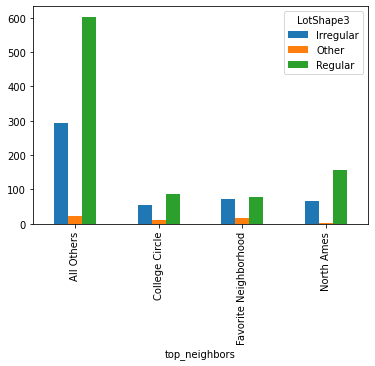

In [0]:
# display that
myresults = pd.crosstab(iowa['top_neighbors'], iowa['LotShape3'])
myresults.plot(kind='bar');

In [0]:
pd.crosstab(iowa['OverallQual'], iowa['top_neighbors'])

top_neighbors,All Others,College Circle,Favorite Neighborhood,North Ames
OverallQual,,,,
1,2,0,0,0
2,3,0,0,0
3,17,0,0,3
4,94,1,1,20
5,253,28,3,113
6,232,24,44,74
7,159,71,77,12
8,108,23,34,3
9,35,3,5,0


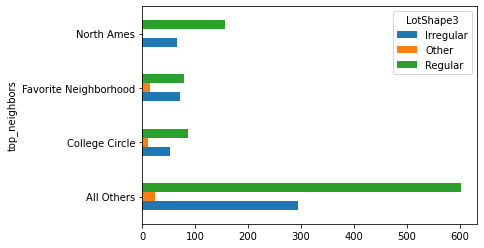

In [0]:
# Flip that
myresults.plot(kind='barh');

## Challenge

I hope you can see how we have used existing columns to create a new column on a dataset that say something new about our unit of observation. This is what making new features (columns) on a dataset is all about and why it's so essential to data science --particularly predictive modeling "Machine Learning." 

We'll spend the rest of the lecture and assignment today trying to get as good as we can at manipulating (cleaning) and creating new columns on datasets.

# [Objective](#work-with-strings) Work with Strings with Pandas

## Overview

So far we have worked with numeric datatypes (ints and floats) but we haven't worked with any columns containing string values. We can't simply use arithmetic to manipulate string values, so we'll need to learn some more techniques in order to work with this datatype.

## Follow Along

We're going to import a new dataset here to work with. This dataset is from LendingClub and holds information about loans issued in Q4 of 2018. This dataset is a bit messy so it will give us plenty of opportunities to clean up existing columns as well as create new ones.

The `!wget` shell command being used here does exactly the same thing that your browser does when you type a URL in the address. It makes a request or "gets" the file at that address. However, in our case the file isn't a webpage, it's a compressed CSV file. 

Try copying and pasting the URL from below into your browser, did it start an automatic download? Any URLs like this that start automatic downloads when navigated to can be used along with the `!wget` command to bring files directly into your notebook's memory.

### Load a new dataset

In [0]:
! wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2020-05-08 02:19:23--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 52.89.126.95, 54.201.144.36, 44.225.46.60
Connecting to resources.lendingclub.com (resources.lendingclub.com)|52.89.126.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [             <=>    ]  22.05M  2.02MB/s    in 11s     

2020-05-08 02:19:34 (1.98 MB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [23121687]



We need to use the `!unzip` command to extract the csv from the zipped folder.

In [0]:
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


As we look at the raw file itself, do you see anything that might cause us trouble as we read in the CSV file to a dataframe?

In [0]:
# Read in the CSV
loans = pd.read_csv('LoanStats_2018Q4.csv')
loans.tail()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,7,13,18,19,24,25,27,28,29,30,31,32,34,36,37,38,39,40,41,42,43,44,46,49,50,51,53,54,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,113,114,115,116,117,118,119,120,121,126,127,131,132,134,135,136,141,142,143) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
NaN                                              NaN 5000  5000  5000   36 months  13.56% 169.83 C   C1  Payoff Clerk         10+ years MORTGAGE 35360.0 Not Verified    Oct-2018 Current n   NaN NaN debt_consolidation Debt consolidation      381xx TN  11.3  1   Jun-2006 0   21.0 NaN 9   0   2597 27.3% 15  f   2751.79 2751.79 3053.17 3053.17 2248.21 804.96  0.0 0.0 0.0 Apr-2020 169.83 May-2020 Apr-2020 0   NaN  1   Individual NaN NaN NaN 0   1413 69785 0   2   0   1   16.0 2379    40.0  3   4   1826 32.0 9500  0   0   1   5   8723   1174.0  60.9 0   0   147.0 85  9   9   2   10.0  21.0 9.0 21.0 0   1   3   2   2   6   6   7   3   9   0.0 0   0   3   92.9 50.0 0   0   93908   4976  3000  6028.0  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN                                                NaN                              
                                                     10000 10000 9750   36 months  11.06% 327.68 B   B3  NaN                  NaN       RENT     44400.0 Source Verified Oct-2018 Current n   NaN NaN credit_card        Credit card refinancing 980xx WA  11.78 0   Oct-2008 2   40.0 NaN 15  0   6269 13.1% 25  f   5411.74 5276.45 5882.88 5735.81 4588.26 1294.62 0.0 0.0 0.0 Apr-2020 327.68 May-2020 Apr-2020 0   53.0 1   Individual NaN NaN NaN 0   520  16440 3   1   1   1   2.0  10171   100.0 2   5   404  28.0 47700 0   3   5   6   1265.0 20037.0 2.3  0   0   61.0  119 1   1   0   1.0   NaN  1.0 40.0 1   2   4   6   8   3   14  22  4   15  0.0 0   0   3   92.0 0.0  0   0   57871.0 16440 20500 10171.0 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN                                                NaN                              
                                                                 10000  36 months  16.91% 356.08 C   C5  Key Accounts Manager 2 years   RENT     80000.0 Not Verified    Oct-2018 Current n   NaN NaN other              Other                   021xx MA  17.72 1   Sep-2006 0   14.0 NaN 17  0   1942 30.8% 31  w   5626.39 5626.39 6400.05 6400.05 4373.61 2026.44 0.0 0.0 0.0 Apr-2020 356.08 May-2020 Apr-2020 0   25.0 1   Individual NaN NaN NaN 0   0    59194 0   15  1   1   12.0 57252.0 85.0  0   0   1942 80.0 6300  0   5   0   1   3482   2058.0  48.5 0   0   144.0 142 40  12  0   131.0 30.0 NaN 30.0 3   1   1   1   5   22  2   9   1   17  0.0 0   0   1   74.2 0.0  0   0   73669   59194 4000  67369   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN                                                NaN                              
Total amount funded in policy code 1: 2050909275 NaN NaN   NaN   NaN   NaN        NaN     NaN    NaN NaN NaN                  NaN       NaN      NaN     NaN             NaN      NaN     NaN NaN NaN NaN                NaN                     NaN   NaN NaN   NaN NaN      NaN NaN  NaN NaN NaN NaN  NaN   NaN NaN NaN     NaN     NaN     NaN     NaN     NaN     NaN NaN NaN NaN      NaN    NaN      NaN      NaN NaN  NaN NaN        NaN NaN NaN NaN NaN  NaN   NaN NaN NaN NaN NaN  NaN     NaN   NaN NaN NaN  NaN  NaN   NaN NaN NaN NaN NaN    NaN     NaN  NaN NaN NaN   NaN NaN NaN NaN NaN   NaN  NaN NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN  NaN NaN NaN     NaN   NaN   NaN     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN                                                NaN                              
Total amount funded in policy code 2: 820109297  NaN NaN   NaN   NaN   NaN        NaN     NaN    NaN NaN NaN                  NaN       NaN      NaN     NaN             NaN      NaN     NaN NaN NaN NaN                NaN                     NaN   NaN NaN   NaN NaN      NaN N

The extra rows at the top and bottom of the file have done two things:

1) The top row has made it so that the entire dataset is being interpreted as column headers

2) The bottom two rows have been read into the 'id' column and are causing every column to have at least two `NaN` values in it.

In [0]:
# We can fix the header problem by using the 'skiprows' parameter
loans = pd.read_csv('LoanStats_2018Q4.csv', header=1, skipfooter=2)
loans.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10000,10000,10000.0,60 months,16.14%,243.93,C,C4,Sale Consultant,2 years,RENT,90000.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,079xx,NJ,8.80,0,Mar-1991,1,NaN,43.0,11,1,10582,58.5%,32,w,0.00,0.00,10661.057727,10661.06,...,80.0,1,0,25600,15470,15000,7500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,6500,6500,6500.0,36 months,11.80%,215.28,B,B4,Educator,2 years,RENT,46500.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,21.01,0,Aug-2011,1,61.0,NaN,24,0,6741,41.6%,30,w,4066.26,4066.26,3222.810000,3222.81,...,0.0,0,0,50845,40223,13300,34645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4500,4500,4500.0,36 months,11.31%,147.99,B,B3,Accounts Examiner III,10+ years,RENT,38500.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,credit_card,Credit card refinancing,786xx,TX,4.64,0,Dec-2003,0,25.0,NaN,12,0,4472,15.3%,25,w,0.00,0.00,4549.217149,4549.22,...,0.0,0,0,53795,29137,15100,24595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,25000,25000,25000.0,60 months,14.47%,587.82,C,C2,teacher,10+ years,OWN,110000.0,Not Verified,Dec-2018,Charged Off,n,NaN,NaN,credit_card,Credit card refinancing,117xx,NY,26.43,1,Jan-1997,0,7.0,NaN,23,0,39053,45.7%,49,w,0.00,0.00,5848.050000,5848.05,...,10.0,0,0,179321,95648,62800,91424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,27.27%,920.91,E,E5,Claims Analyst,1 year,RENT,50000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,857xx,AZ,23.62,0,Dec-1997,1,NaN,NaN,10,0,1258,10.7%,16,w,25780.25,25780.25,13745.470000,13745.47,...,0.0,0,0,46300,27364,10100,34500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
loans.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
128407,NaN,NaN,23000,23000,23000.0,36 months,15.02%,797.53,C,C3,Tax Consultant,10+ years,MORTGAGE,75000.0,Source Verified,Oct-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,20.95,1,Aug-1985,2,22.0,NaN,12,0,22465,43.6%,28,w,0.00,0.00,1547.08,1547.08,...,14.3,0,0,296500,40614,47100,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128408,NaN,NaN,10000,10000,10000.0,36 months,15.02%,346.76,C,C3,security guard,5 years,MORTGAGE,38000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,443xx,OH,13.16,3,Jul-1982,0,6.0,NaN,11,0,5634,37.1%,16,w,5557.25,5557.25,6233.34,6233.34,...,40.0,0,0,91403,9323,9100,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128409,NaN,NaN,5000,5000,5000.0,36 months,13.56%,169.83,C,C1,Payoff Clerk,10+ years,MORTGAGE,35360.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,381xx,TN,11.30,1,Jun-2006,0,21.0,NaN,9,0,2597,27.3%,15,f,2751.79,2751.79,3053.17,3053.17,...,50.0,0,0,93908,4976,3000,6028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128410,NaN,NaN,10000,10000,9750.0,36 months,11.06%,327.68,B,B3,NaN,NaN,RENT,44400.0,Source Verified,Oct-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,980xx,WA,11.78,0,Oct-2008,2,40.0,NaN,15,0,6269,13.1%,25,f,5411.74,5276.45,5882.88,5735.81,...,0.0,0,0,57871,16440,20500,10171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128411,NaN,NaN,10000,10000,10000.0,36 months,16.91%,356.08,C,C5,Key Accounts Manager,2 years,RENT,80000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,other,Other,021xx,MA,17.72,1,Sep-2006,0,14.0,NaN,17,0,1942,30.8%,31,w,5626.39,5626.39,6400.05,6400.05,...,0.0,0,0,73669,59194,4000,67369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


Lets look at the NaN values of each column so that you can see the problem that the extra rows at the bottom of the file are creating for us

In [0]:
loans.shape

(128412, 144)

In [0]:
# Sum null values by column and sort from least to greatest
pd.set_option('display.max_rows', 143)
loans.isnull().sum().sort_values(ascending=False)

id                          128412
member_id                   128412
url                         128412
desc                        128412
settlement_percentage       127661
                             ...  
acc_open_past_24mths             0
chargeoff_within_12_mths         0
delinq_amnt                      0
mo_sin_old_rev_tl_op             0
inq_fi                           0
Length: 144, dtype: int64

In [0]:
# Address the extra NaNs in each column by skipping the footer as well.

In [0]:
#skipfooter
loans.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
128407,NaN,NaN,23000,23000,23000.0,36 months,15.02%,797.53,C,C3,Tax Consultant,10+ years,MORTGAGE,75000.0,Source Verified,Oct-2018,Charged Off,n,NaN,debt_consolidation,Debt consolidation,352xx,AL,20.95,1,Aug-1985,2,22.0,NaN,12,0,22465,43.6%,28,w,0.00,0.00,1547.08,1547.08,1025.67,...,14.3,0,0,296500,40614,47100,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128408,NaN,NaN,10000,10000,10000.0,36 months,15.02%,346.76,C,C3,security guard,5 years,MORTGAGE,38000.0,Not Verified,Oct-2018,Current,n,NaN,debt_consolidation,Debt consolidation,443xx,OH,13.16,3,Jul-1982,0,6.0,NaN,11,0,5634,37.1%,16,w,5557.25,5557.25,6233.34,6233.34,4442.75,...,40.0,0,0,91403,9323,9100,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128409,NaN,NaN,5000,5000,5000.0,36 months,13.56%,169.83,C,C1,Payoff Clerk,10+ years,MORTGAGE,35360.0,Not Verified,Oct-2018,Current,n,NaN,debt_consolidation,Debt consolidation,381xx,TN,11.30,1,Jun-2006,0,21.0,NaN,9,0,2597,27.3%,15,f,2751.79,2751.79,3053.17,3053.17,2248.21,...,50.0,0,0,93908,4976,3000,6028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128410,NaN,NaN,10000,10000,9750.0,36 months,11.06%,327.68,B,B3,NaN,NaN,RENT,44400.0,Source Verified,Oct-2018,Current,n,NaN,credit_card,Credit card refinancing,980xx,WA,11.78,0,Oct-2008,2,40.0,NaN,15,0,6269,13.1%,25,f,5411.74,5276.45,5882.88,5735.81,4588.26,...,0.0,0,0,57871,16440,20500,10171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128411,NaN,NaN,10000,10000,10000.0,36 months,16.91%,356.08,C,C5,Key Accounts Manager,2 years,RENT,80000.0,Not Verified,Oct-2018,Current,n,NaN,other,Other,021xx,MA,17.72,1,Sep-2006,0,14.0,NaN,17,0,1942,30.8%,31,w,5626.39,5626.39,6400.05,6400.05,4373.61,...,0.0,0,0,73669,59194,4000,67369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


For good measure, we'll also drop some columns that are made up completely of NaN values.

Why might LendingClub have included columns in their dataset that are 100% blank?

In [0]:
# drop an entire column
loans.drop('url',axis=1, inplace=True)

### Clean up the `int_rate` column

When we're preparing a dataset for a machine learning model we typically want to represent don't want to leave any string values in our dataset --because it's hard to do math on words. 

Specifically, we have a column that is representing a numeric value, but currently doesn't have a numeric datatype. Lets look at the first 10 values of the `int_rate` column

In [0]:
# Look at the first 10 values of the int_rate column
loans['int_rate'].head(10)

0     16.14%
1     11.80%
2     11.31%
3     14.47%
4     27.27%
5     16.14%
6     12.98%
7     12.98%
8     10.33%
9     23.40%
Name: int_rate, dtype: object

In [0]:
# Look at a specific value from the int_rate column
loans['int_rate'][3]

' 14.47%'

In [0]:
# confirm that
loans['int_rate'].dtype

dtype('O')

In [0]:
# confirm again
type(loans['int_rate'][3])

str

Problems that we need to address with this column:

- String column that should be numeric
- Percent Sign `%` included with the number
- Leading space at the beginning of the string

However, we're not going to try and write exactly the right code to fix this column in one go. We're going to methodically build up to the code that will help us address these problems.


In [0]:
# Lets start with just fixing a single string.
# If we can fix one, we can usually fix all of them
int_rate = ' 14.47%'

In [0]:
# remove leading space
int_rate.strip()

'14.47%'

In [0]:
# remove percent
int_rate.strip('%')

' 14.47'

In [0]:
# remove both
int_rate.strip().strip('%')

'14.47'

In [0]:
# "Cast" the string value to a float
float('14.47')

14.47

In [0]:
# put it all together
float(int_rate.strip().strip('%'))

14.47

In [0]:
# check our work
type(float(int_rate.strip().strip('%')))

float

### Write a function to make our solution reusable!

In [0]:
# Write a function that can do what we have written above to any 
# string that is passed to it.
def myfunc(my_input_value):
    return float(my_input_value.strip().strip('%'))


In [0]:
# Test out our function by calling it on our example
myfunc(int_rate)

14.47

In [0]:
# is the data type correct?
type(myfunc(int_rate))

float

### Apply our solution to every cell in a column

In [0]:
# for loop:
new_list=[]
for cell in loans['int_rate']:
  new_list.append(myfunc(cell))

In [0]:
# look at first 10 values of that list:
new_list[:10]

[16.14, 11.8, 11.31, 14.47, 27.27, 16.14, 12.98, 12.98, 10.33, 23.4]

In [0]:
# compare to original values
loans['int_rate'].head()
list(loans['int_rate'][:10])

[' 16.14%',
 ' 11.80%',
 ' 11.31%',
 ' 14.47%',
 ' 27.27%',
 ' 16.14%',
 ' 12.98%',
 ' 12.98%',
 ' 10.33%',
 ' 23.40%']

In [0]:
# convert that list to a new column
loans['int_rate_clean']=pd.Series(new_list)

In [0]:
# comparison
loans[['int_rate', 'int_rate_clean']].sample(7)

,int_rate,int_rate_clean
75479,6.67%,6.67
56054,16.14%,16.14
33680,11.31%,11.31
56810,8.19%,8.19
39611,11.80%,11.80
97290,15.02%,15.02
85349,10.47%,10.47


In [0]:
# What type of data is held in our new column?
loans['int_rate_clean'].dtype

dtype('float64')

there is a better way!


In [0]:
# improve all of this code with the .apply function!
loans['int_rate_clean2'] = loans['int_rate'].apply(myfunc)

In [0]:
# comparison
loans[['int_rate', 'int_rate_clean', 'int_rate_clean2']].sample(7)

,int_rate,int_rate_clean,int_rate_clean2
41915,13.56%,13.56,13.56
112804,16.14%,16.14,16.14
89495,15.02%,15.02,15.02
33582,13.56%,13.56,13.56
70089,11.31%,11.31,11.31
83799,11.55%,11.55,11.55
69968,12.98%,12.98,12.98


## Challenge

We can create a new column with our cleaned values or overwrite the original, whatever we think best suits our needs. On your assignment you will take the same approach in trying to methodically build up the complexity of your code until you have a few lines that will work for any cell in a column. At that point you'll contain all of that functionality in a reusable function block and then use the `.apply()` function to... well... apply those changes to an entire column.

# [Objective](#pandas-apply) Modify and Create Columns using `.apply()`



## Overview

We're already seen one example of using the `.apply()` function to clean up a column. Lets see if we can do it again, but this time on a slightly more complicated use case.

Remember, the goal here is to write a function that will work correctly on any **individual** cell of a specific column. Then we can reuse that function on those individual cells of a dataframe column via the `.apply()` function.

Lets clean up the emp_title "Employment Title" column!

## Follow Along

First we'll try and diagnose how bad the problem is and what improvements we might be able to make.

In [0]:
# look at the top 20 rows
loans['emp_title'].head(20)

0                          Sale Consultant
1                                Educator 
2                    Accounts Examiner III
3                                  teacher
4                           Claims Analyst
5                         Training Manager
6                             Tire builder
7               Program Support Assistant 
8                                   Driver
9                                   BANKER
10                        Business Analyst
11                                OPERATOR
12                        Shift Supervisor
13                                 Driver 
14    Assistant to the Treasurer (Payroll)
15               Reimbursement specialist 
16                       Financial Advisor
17                                Engineer
18                   Sales Account Manager
19                                     Cna
Name: emp_title, dtype: object

In [0]:
# Look at the top 20 employment titles
loans['emp_title'].value_counts(dropna=False).head(20)

NaN                   20947
Teacher                2090
Manager                1773
Registered Nurse        952
Driver                  924
RN                      726
Supervisor              697
Sales                   580
Project Manager         526
General Manager         523
Office Manager          521
Owner                   420
Director                402
Truck Driver            387
Operations Manager      387
Nurse                   326
Engineer                325
Sales Manager           304
manager                 301
Supervisor              270
Name: emp_title, dtype: int64

In [0]:
# How many different unique employment titles are there currently?
print(loans.shape)
len(loans['emp_title'].unique())

(128412, 145)


43893

In [0]:
# another way to do this
loans['emp_title'].nunique()

43892

In [0]:
# How often is the employment_title null?
loans['emp_title'].isnull().sum()

20947

What are some possible reasons as to why a person's employment title may have not been provided?

In [0]:
# Create some examples that represent the cases that we want to clean up
examples = ['owner', 'Supervisor', ' Project Manager', np.nan]

In [0]:
# do that same function in individual steps
type('Supervisor')
isinstance('Supervisor', str)

True

In [0]:
# what about the strip?
' supervisor'.title().strip()

'Supervisor'

In [0]:
# Write a function to clean up these use cases and increase uniformity.
def clean_title(jobtitle):
  if isinstance(jobtitle, str):
    return (jobtitle.title().strip())
  else:
    return 'Unknown'

In [0]:
# test our function
clean_title(' superviSOR')
clean_title(np.nan)

'Unknown'

In [0]:
# create a for loop:
mylist = []
for jobtitle in examples:
  mylist.append(clean_title(jobtitle))
mylist

['Owner', 'Supervisor', 'Project Manager', 'Unknown']

In [0]:
# list comprehensions can combine function calls and for loops over lists
# into one succinct and fairly readable single line of code.
[clean_title(jobtitle) for jobtitle in examples]

['Owner', 'Supervisor', 'Project Manager', 'Unknown']

In [0]:
# We have a function that works as expected. Lets apply it to our column.
# This time we'll overwrite the original column

loans['clean_title'] = loans['emp_title'].apply(clean_title)

In [0]:
# check our work

loans[['emp_title','clean_title']].sample(20)

,emp_title,clean_title
91700,teller,Teller
122105,Project Manager,Project Manager
10266,NaN,Unknown
95519,Sales,Sales
91460,Floor technician,Floor Technician
118978,Field Service Manager,Field Service Manager
87524,Bookkeeper,Bookkeeper
68450,RN,Rn
58625,Human Resources Analyst,Human Resources Analyst
30479,Owner,Owner


We can use the same code as we did earlier to see how much progress was made.


In [0]:
# Look at the top 20 employment titles


In [0]:
# How many different unique employment titles are there currently?

In [0]:
# recoding a categorical

In [0]:
# How often is the employment_title null (NaN)?


## Challenge

Using the .apply() function isn't always about creating new columns on a dataframe, we can use it to clean up or modify existing columns as well. 

# [Objective](#dates-and-times) Work with Dates and Times with Pandas

## Overview

Pandas has its own datatype datatype that makes it extremely convenient to convert strings that are in standard date formates to datetime objects and then use those datetime objects to either create new features on a dataframe or work with the dataset in a timeseries fashion. 

This section will demonstrate how to take a column of date strings, convert it to a datetime object and then use the datetime formatting `.dt` to access specific parts of the date (year, month, day) to generate useful columns on a dataframe.

## Follow Along

### Work with Dates 

pandas documentation
- [to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)
- [Time/Date Components](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components) "You can access these properties via the `.dt` accessor"

Many of the most useful date columns in this dataset have the suffix `_d` to indicate that they correspond to dates.

We'll use a list comprehension to print them out

In [0]:
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_clean,int_rate_clean2,clean_title
0,NaN,NaN,10000,10000,10000.0,60 months,16.14%,243.93,C,C4,Sale Consultant,2 years,RENT,90000.0,Not Verified,Dec-2018,Fully Paid,n,NaN,debt_consolidation,Debt consolidation,079xx,NJ,8.80,0,Mar-1991,1,NaN,43.0,11,1,10582,58.5%,32,w,0.00,0.00,10661.057727,10661.06,10000.00,...,25600,15470,15000,7500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.14,16.14,Sale Consultant
1,NaN,NaN,6500,6500,6500.0,36 months,11.80%,215.28,B,B4,Educator,2 years,RENT,46500.0,Source Verified,Dec-2018,Current,n,NaN,debt_consolidation,Debt consolidation,352xx,AL,21.01,0,Aug-2011,1,61.0,NaN,24,0,6741,41.6%,30,w,4066.26,4066.26,3222.810000,3222.81,2433.74,...,50845,40223,13300,34645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,11.80,11.80,Educator
2,NaN,NaN,4500,4500,4500.0,36 months,11.31%,147.99,B,B3,Accounts Examiner III,10+ years,RENT,38500.0,Not Verified,Dec-2018,Fully Paid,n,NaN,credit_card,Credit card refinancing,786xx,TX,4.64,0,Dec-2003,0,25.0,NaN,12,0,4472,15.3%,25,w,0.00,0.00,4549.217149,4549.22,4500.00,...,53795,29137,15100,24595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,11.31,11.31,Accounts Examiner Iii
3,NaN,NaN,25000,25000,25000.0,60 months,14.47%,587.82,C,C2,teacher,10+ years,OWN,110000.0,Not Verified,Dec-2018,Charged Off,n,NaN,credit_card,Credit card refinancing,117xx,NY,26.43,1,Jan-1997,0,7.0,NaN,23,0,39053,45.7%,49,w,0.00,0.00,5848.050000,5848.05,3024.11,...,179321,95648,62800,91424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47,14.47,Teacher
4,NaN,NaN,30000,30000,30000.0,60 months,27.27%,920.91,E,E5,Claims Analyst,1 year,RENT,50000.0,Not Verified,Dec-2018,Current,n,NaN,debt_consolidation,Debt consolidation,857xx,AZ,23.62,0,Dec-1997,1,NaN,NaN,10,0,1258,10.7%,16,w,25780.25,25780.25,13745.470000,13745.47,4219.75,...,46300,27364,10100,34500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,27.27,27.27,Claims Analyst


In [0]:
# list all columns
loans.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term', 'int_rate_clean',
       'int_rate_clean2', 'clean_title'],
      dtype='object', length=146)

In [0]:
# check out one column
loans['issue_d'].head()

0    Dec-2018
1    Dec-2018
2    Dec-2018
3    Dec-2018
4    Dec-2018
Name: issue_d, dtype: object

In [0]:
# as a for loop:
mylst = []
for col in loans.columns:
  if col.endswith('_d'):
    mylst.append(col)
mylst

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [0]:
# as a list comprehension:
my_date_cols = [col for col in loans.columns if col.endswith('_d')]
my_date_cols

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

Lets look at the string format of the `issue_d` column

In [0]:
# dtype
type(loans['issue_d'][0])

str

Because this string format %m-%y is a common datetime format, we can just let Pandas detect this format and translate it to the appropriate datetime object.

In [0]:
# infer_datetime_format=True
loans['new_issue_d'] = pd.to_datetime(loans['issue_d'], infer_datetime_format=True)

In [0]:
loans[['issue_d', 'new_issue_d']].head()

,issue_d,new_issue_d
0,Dec-2018,2018-12-01
1,Dec-2018,2018-12-01
2,Dec-2018,2018-12-01
3,Dec-2018,2018-12-01
4,Dec-2018,2018-12-01


In [0]:
# check our work
type(loans['new_issue_d'][3])

pandas._libs.tslibs.timestamps.Timestamp

In [0]:
print(loans['new_issue_d'].dtype)
loans['new_issue_d'].dtype

datetime64[ns]


dtype('<M8[ns]')

Now we can see that the `issue_d` column has been changed to hold `datetime` objects.

Lets look at one of the cells specifically to see what a datetime object looks like:

In [0]:
loans['new_issue_d'].head(1).values

array(['2018-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

You can see how the month and year have been indicated by the strings that were contained in the column previously, and that the rest of the values have been inferred.

We can use the `.dt` accessor to now grab specific parts of the datetime object. Lets grab just the year from the all of the cells in the `issue_d` column

In [0]:
loans['year'] = loans['new_issue_d'].dt.year
loans[['issue_d', 'new_issue_d', 'year']].head()

,issue_d,new_issue_d,year
0,Dec-2018,2018-12-01,2018
1,Dec-2018,2018-12-01,2018
2,Dec-2018,2018-12-01,2018
3,Dec-2018,2018-12-01,2018
4,Dec-2018,2018-12-01,2018


Now the month.

In [0]:
loans['month'] = loans['new_issue_d'].dt.month
loans[['issue_d', 'new_issue_d', 'year', 'month']].head()

,issue_d,new_issue_d,year,month
0,Dec-2018,2018-12-01,2018,12
1,Dec-2018,2018-12-01,2018,12
2,Dec-2018,2018-12-01,2018,12
3,Dec-2018,2018-12-01,2018,12
4,Dec-2018,2018-12-01,2018,12


In [0]:
# look at their types!
loans['weekday'] = loans['new_issue_d'].dt.weekday
loans[['issue_d', 'new_issue_d', 'year', 'month', 'weekday']].sample(10)

,issue_d,new_issue_d,year,month,weekday
58084,Nov-2018,2018-11-01,2018,11,3
50648,Nov-2018,2018-11-01,2018,11,3
69684,Nov-2018,2018-11-01,2018,11,3
91908,Oct-2018,2018-10-01,2018,10,0
86839,Oct-2018,2018-10-01,2018,10,0
125070,Oct-2018,2018-10-01,2018,10,0
108207,Oct-2018,2018-10-01,2018,10,0
88132,Oct-2018,2018-10-01,2018,10,0
30858,Dec-2018,2018-12-01,2018,12,5
11277,Dec-2018,2018-12-01,2018,12,5


It's just that easy! Now, instead of printing them out, lets add these year and month values as new columns on our dataframe. Again, you'll have to scroll all the way over to the right in the table to see the new columns.

In [0]:
# same thing, diff var
loans['new_pull'] = pd.to_datetime(loans['last_credit_pull_d'])
loans['month_pull'] = loans['new_pull'].dt.month
loans[['last_credit_pull_d', 'new_pull', 'month_pull']].head()

,last_credit_pull_d,new_pull,month_pull
0,Dec-2019,2019-12-01,12.0
1,Apr-2020,2020-04-01,4.0
2,Feb-2020,2020-02-01,2.0
3,Apr-2020,2020-04-01,4.0
4,Apr-2020,2020-04-01,4.0


Because all of these dates come from Q4 of 2018, the `issue_d` column isn't all that interesting. Lets look at the `earliest_cr_line` column, which is also a string, but that could be converted to datetime format.

We're going to create a new column called `days_from_earliest_credit_to_issue`

It's a long column header, but think about how valuable this piece of information could be. This number will essentially indicate the length of a person's credit history and if that is correlated with repayment or other factors could be a valuable predictor!

In [0]:
# date arithmetic
loans['day_diff'] = loans['new_issue_d'] - loans['new_pull']

In [0]:
# check that out
loans[['last_credit_pull_d', 'new_pull', 'day_diff']].head()

,last_credit_pull_d,new_pull,day_diff
0,Dec-2019,2019-12-01,-365 days
1,Apr-2020,2020-04-01,-487 days
2,Feb-2020,2020-02-01,-427 days
3,Apr-2020,2020-04-01,-487 days
4,Apr-2020,2020-04-01,-487 days


In [0]:
loans['day_diff'].value_counts().sort_index().tail()

-30 days     87
0 days      475
30 days      73
31 days      33
61 days       1
Name: day_diff, dtype: int64

What we're about to do is so cool! Pandas' datetime format is so smart that we can simply use the subtraction operator `-` in order to calculate the amount of time between two dates. 

Think about everything that's going on under the hood in order to give us such straightforward syntax! Handling months of different lengths, leap years, etc. Pandas datetime objects are seriously powerful!

What's oldest credit history that was involved in Q4 2018? 

25,171 days is ~ 68.96 years of credit history!

## Challenge

Pandas' datetime format is so easy to work with that there's really no excuse for not using dates to make features on a dataframe! Get ready to practice more of this on your assignment.